# Reading multiple csv files with Spark


In [1]:
# Import our SparkSession so we can use it
from pyspark.sql import SparkSession
# Create our SparkSession, this can take a couple minutes locally
spark = SparkSession.builder.appName("basics").getOrCreate()

In [ ]:
# Load in data
from pyspark import SparkFiles #same

url = "Resources/Turnstile_data/*.csv"
df = spark.read.csv(url, header=True, mode="DROPMALFORMED")

df.show() 

In [ ]:
# Print our schema
df.printSchema()

In [ ]:
df.count()

In [ ]:
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import datetime as dt
import re
import time

import matplotlib.pyplot as plt

import seaborn as sns


In [ ]:
grouped_turnstile = df.groupBy("Station").agg({'Entries': 'mean'}).collect()
grouped_turnstile

In [ ]:
df1 = spark.createDataFrame(grouped_turnstile)
df1.show()

In [ ]:
from pyspark.sql.types import DoubleType
df1 = df1.withColumn("avg(Entries)", df1["avg(Entries)"].cast(DoubleType()))
df1.show()


In [ ]:
df2 = df1.withColumn("Avg_Entries", func.round(df1["avg(Entries)"], 2))
df2.show()

In [ ]:
# from pyspark.sql.functions import avg
# display(type_df.groupBy("Station").avg("Entries"))

In [ ]:
from pyspark.sql.functions import desc

df2.sort(desc("Avg_Entries")).show()

In [ ]:
pandas_df = df2.toPandas()
pandas_df.head()

In [ ]:
pandas_df_1 = pandas_df.iloc[0:10] # first 10 rows of dataframe
pandas_df_1.head()

In [ ]:
import matplotlib.gridspec as gridspec
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

df_1 = pandas_df_1["Station"]
df_2 = pandas_df_1["Avg_Entries"]

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("Top 10 Subway Stations with highest Entries", fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()

In [ ]:
grouped_turnstile_Ex= df.groupBy("Station").agg({'Exits                                                     ': 'mean'}).collect()
grouped_turnstile_Ex

In [ ]:
df3 = spark.createDataFrame(grouped_turnstile_Ex)
df3.show()

In [ ]:
df3 = spark.createDataFrame(grouped_turnstile_Ex)

In [ ]:
from pyspark.sql.types import DoubleType
df4 = df3.withColumn("avg(Exits                                                     )", df3["avg(Exits                                                     )"].cast(DoubleType()))
df4.show()


In [ ]:
df5 = df4.withColumn("Avg_Exits", func.round(df4["avg(Exits                                                     )"], 2))
df5.show()

In [ ]:
from pyspark.sql.functions import desc

df5.sort(desc("Avg_Exits")).show()

In [ ]:
pandas_df_2 = df5.toPandas()
pandas_df_2.sort_values('Avg_Exits', ascending=False)


In [ ]:
pandas_df_exits = pandas_df_2.iloc[0:10] # first 10 rows of dataframe
pandas_df_exits

In [ ]:
df_1_exits = pandas_df_exits["Station"]
df_2_exits = pandas_df_exits['Avg_Exits']

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("Top 10 Subway Stations with highest Exits", fontsize=20)
pie = plt.pie(df_2_exits,labels = df_1_exits, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()

# Using Pandas




In [14]:
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import datetime as dt
import re
import time
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

import seaborn as sns


In [9]:
df = pd.read_csv("Resources/Turnstile_data/Turnstile_Usage_Data__2016.csv")
df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972


In [10]:
df1 = df.groupby("Station").agg({"Entries" : "mean"})
df1.head()


,Entries
Station,
1 AV,1.458149e+08
103 ST,1.024999e+07
103 ST-CORONA,7.133855e+06
104 ST,4.931395e+08
110 ST,4.529651e+06


In [11]:
df2 = df1.sort_values(by='Entries', ascending=False)
df2.head(10)

,Entries
Station,
104 ST,4.931395e+08
57 ST-7 AV,4.726744e+08
183 ST,4.481813e+08
138/GRAND CONC,3.320978e+08
163 ST-AMSTERDM,3.284655e+08
6 AV,2.435660e+08
CHRISTOPHER ST,2.335950e+08
116 ST-COLUMBIA,2.019516e+08
BROOKLYN BRIDGE,1.723064e+08


In [12]:
df3 = df2.reset_index()
df3.head()

,Station,Entries
0,104 ST,4.931395e+08
1,57 ST-7 AV,4.726744e+08
2,183 ST,4.481813e+08
3,138/GRAND CONC,3.320978e+08
4,163 ST-AMSTERDM,3.284655e+08


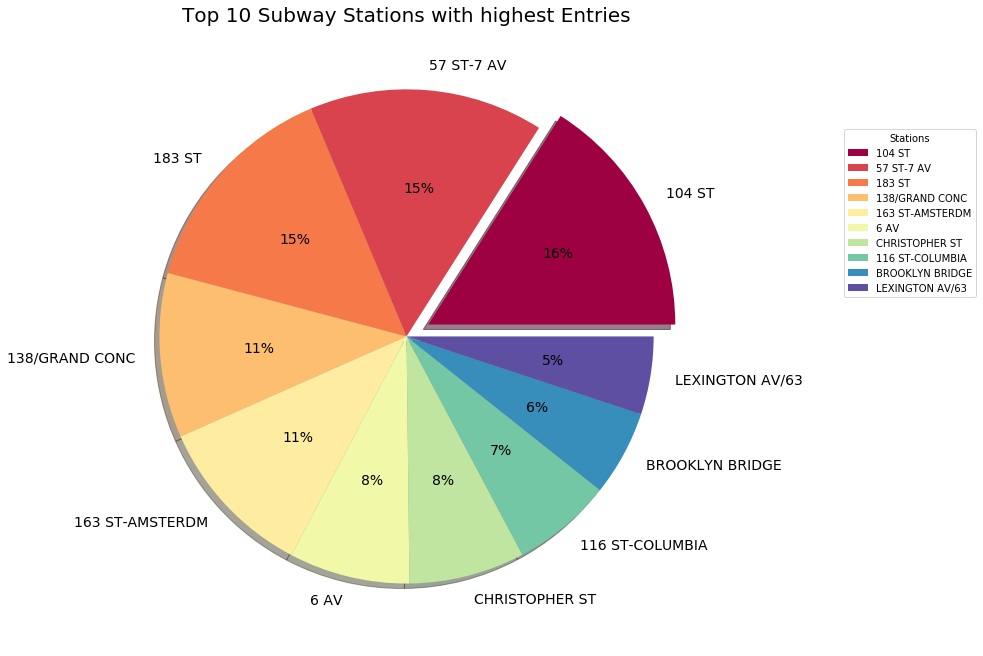

In [15]:

df_1 = df3["Station"].iloc[0:10]
df_2 = df3["Entries"].iloc[0:10]

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("Top 10 Subway Stations with highest Entries", fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()

In [32]:
df1_a = df.groupby("Station")
df1_a.head(5)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972
24998,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,12/30/2016,21:00:00,REGULAR,2626918,4518014
24999,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,12/30/2016,17:00:00,REGULAR,2626311,4517668
25000,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,12/30/2016,13:00:00,REGULAR,2625697,4516786
25001,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,12/30/2016,09:00:00,REGULAR,2625538,4515889
25002,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,12/30/2016,05:00:00,REGULAR,2625501,4515365


In [24]:
df.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries',
       'Exits                                                     '],
      dtype='object')

In [27]:
df1_b = df.groupby("Station").agg({'Exits                                                     ' : "mean"})
df1_b.head()

,Exits
Station,
1 AV,2.099498e+08
103 ST,3.853166e+07
103 ST-CORONA,6.789290e+06
104 ST,4.608975e+08
110 ST,4.668179e+06


In [29]:
df2_b = df1_b.sort_values(by='Exits                                                     ' , ascending=False)
df2_b.head(10)

,Exits
Station,
183 ST,4.674262e+08
104 ST,4.608975e+08
57 ST-7 AV,4.024713e+08
138/GRAND CONC,3.207024e+08
AVENUE I,2.511250e+08
45 ST,2.408335e+08
6 AV,2.407223e+08
1 AV,2.099498e+08
FREEMAN ST,1.717223e+08


In [30]:
df3_b = df2_b.reset_index()
df3_b.head()

,Station,Exits
0,183 ST,4.674262e+08
1,104 ST,4.608975e+08
2,57 ST-7 AV,4.024713e+08
3,138/GRAND CONC,3.207024e+08
4,AVENUE I,2.511250e+08


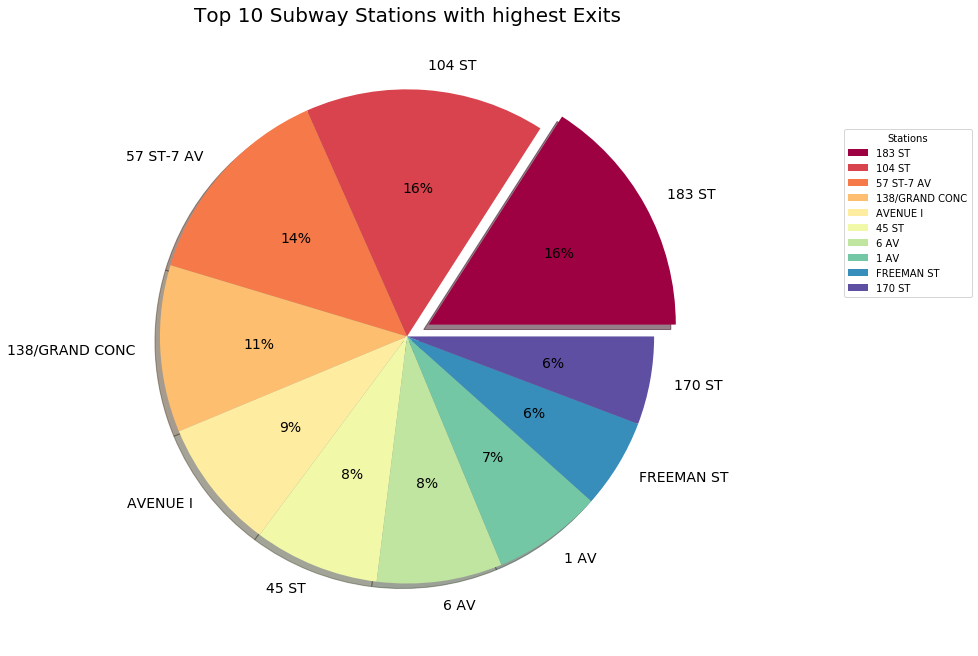

In [31]:
df_1 = df3_b["Station"].iloc[0:10]
df_2 = df3_b["Exits                                                     "].iloc[0:10]

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("Top 10 Subway Stations with highest Exits", fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()